In [4]:
import gym
import numpy as np
import random as pr
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [3]:
def rargmax(vector):
    """ Argmax that choose randomly eligible maximu indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


register(
        id='Frozenlake-v0',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4',
            'is_slippery':True
            }
        )

env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n]) # 4*4 tables and 4 action 16*4 for frozen lake
num_episodes = 2000
dis = .9 #decay rate
# create list to contain total rewards and steps per episodes
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    while not done:
        action = np.argmax(Q[state, :]+np.random.rand(1,env.action_space.n)/(i+1)) #add random noise

        # Get new state and reward from env
        new_state, reward, done, _ = env.step(action)

        # Update Q-table with new knowldege using learning rate
        Q[state,action] = reward + dis * np.max(Q[new_state,:]) # Update Q with Decay rate
        rAll += reward
        state = new_state
    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

Error: Cannot re-register id: Frozenlake-v0

[2017-09-06 00:07:26,521] Making new env: FrozenLake-v0


Success rate: 0.5965
Final Q-Table Values
[[  4.18876400e-01   5.28018482e-03   3.81806201e-03   9.14329681e-03]
 [  4.75408153e-03   2.74504169e-03   0.00000000e+00   5.43619284e-01]
 [  4.79261737e-01   9.76386426e-04   0.00000000e+00   1.03359581e-03]
 [  0.00000000e+00   5.65677742e-03   0.00000000e+00   0.00000000e+00]
 [  5.61550248e-01   1.04382739e-04   3.24646851e-03   4.71013440e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.66533645e-01   1.06312313e-10   1.05848335e-05   2.65803032e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.60934405e-03   1.20515731e-04   4.81046457e-03   5.91724379e-01]
 [  0.00000000e+00   2.92363013e-01   0.00000000e+00   0.00000000e+00]
 [  2.75624938e-01   6.71888715e-04   5.51270125e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00

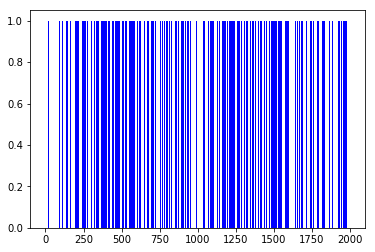

In [13]:
def rargmax(vector):
    """ Argmax that choose randomly eligible maximu indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


register(
        id='Frozenlake-v001',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4',
            'is_slippery':True
            }
        )

env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n]) # 4*4 tables and 4 action 16*4 for frozen lake
learning_rate = .85
num_episodes = 2000
dis = .99 #decay rate
# create list to contain total rewards and steps per episodes
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    while not done:
        action = np.argmax(Q[state, :]+np.random.rand(1,env.action_space.n)/(i+1)) #add random noise

        # Get new state and reward from env
        new_state, reward, done, _ = env.step(action)

        # Update Q-table with new knowldege using learning rate
        Q[state,action] = (1-learning_rate)*Q[state,action] \
        + learning_rate*(reward + dis * np.max(Q[new_state,:])) # Update Q with Decay rate
        rAll += reward
        state = new_state
    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()